https://www.gymlibrary.dev/environments/toy_text/frozen_lake/

In [ ]:
!pip install gym

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import gym
import random
import time
import matplotlib.pyplot as plt
#from IPython.display import clear_output
#import IPython.display

# Environment - FrozenLake

https://www.gymlibrary.ml/environments/toy_text/frozen_lake/?highlight=frozen+lake 



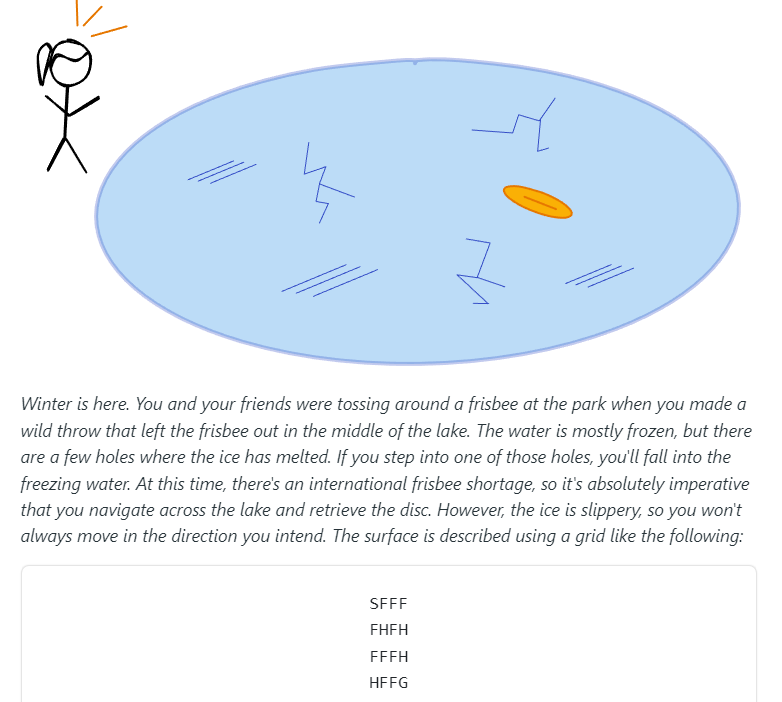

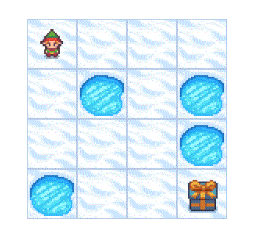

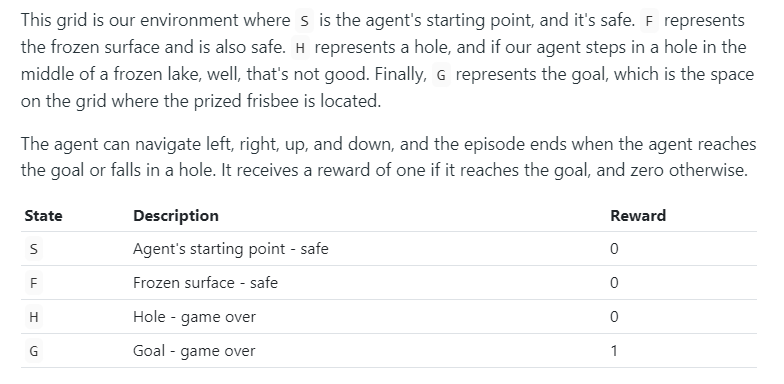

In [ ]:
env = gym.make('FrozenLake-v1')

Creating The Q-Table



> construct our Q-table, and initialize all the Q-values to zero for each state-action pair.

> Remember, the number of rows in the table is equivalent to the size of the state space in the environment, and the number of columns is equivalent to the size of the action space. 






In [ ]:
action_space_size = env.action_space.n                         #Size of action space i.e size of columns in Q_table
state_space_size = env.observation_space.n                     #Size of state space i.e size of rows in Q_table 

In [ ]:
print(env.action_space)

Discrete(4)


In [ ]:
print(env.observation_space)

Discrete(16)


In [ ]:
print(state_space_size)          

16


16 state >>

S F F F F H F H F F F H H F F G

In Grid form:

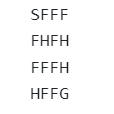

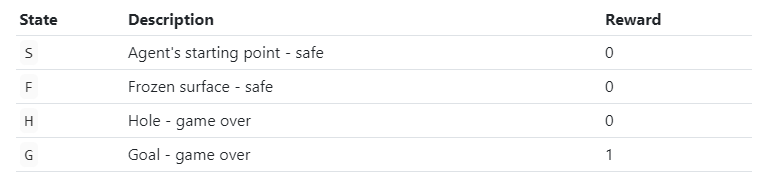

In [ ]:
print(action_space_size)         # right,left,up,down

4


Define the value_iteration function, which takes the environment as
a parameter:

understanding value_iteration component:

1.There will be 1000 iterartions.

2.In each iteration, initially value table is copied and known as updated value table..In value table, value of the 16 states are updated in each iterations..

3.Under each iteration, there will be for loop with 16 steps.each step is meant for each state in order

4.Q values are calculated for each state with its four actions.

5.For each action, state -action pair step with environment which outputs transition propbability, new state  and reward.

6.Using Q value formula (applying transition probability,value_of_new state(from value table), reward) get Q values for a state-action pair..for each state there will be 4 Q values will get..Update these on Q table..and also find maximum of these.. 

7.To update state value in the value table, get maximum of Q values calculated in step 6. 

8.Compute Absolute difference between updated value table and value table and the differennce is <= threshold value..Break the iteration...i.e convergence


In [ ]:
def value_iteration(env):

    #set the number of iterations
    num_iterations = 1000
    
    #set the threshold number for checking the convergence of the value function
    threshold = 1e-20  # 0.000 000 000 000 000 000 01
    
    #we also set the discount factor
    gamma = 1.0
    
    #now, we will initialize the value table, with the value of all states to zero
    value_table = np.zeros(env.observation_space.n) # array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]) #16 states
    
    #for every iteration
    for i in range(num_iterations):
        
        #update the value table, that is, we learned that on every iteration, we use the updated value
        #table (state values) from the previous iteration
        updated_value_table = np.copy(value_table) 
             
        #now, we compute the value function (state value) by taking the maximum of Q value.
        
        #thus, for each state, we compute the Q values of all the actions in the state and then
        #we update the value of the state as the one which has maximum Q value as shown below:
        for s in range(env.observation_space.n):
            
            Q_values = [sum([prob*(r + gamma * updated_value_table[s_])
                             for prob, s_, r, _ in env.P[s][a]]) 
                                   for a in range(env.action_space.n)] 
            # for all states of environment get 
                                        
            value_table[s] = max(Q_values) 
                        
        #after computing the value table, that is, value of all the states, we check whether the
        #difference between value table obtained in the current iteration and previous iteration is
        #less than or equal to a threshold value if it is less then we break the loop and return the
        #value table as our optimal value function as shown below:
    
        if (np.sum(np.fabs(updated_value_table - value_table)) <= threshold):   #Compute the absolute values element-wise
             break
    
    return value_table

Extract Optimum policy from Value table:

1.Value table is filled with values of state after convergence training over 1000 epochs.

2.Extracting policy is like doing inference from trained network

3.For each state , there will be 4 state-action pair, for each state-action pair obtain Q value using the same formula used in training..And get maximum Q value and there by best action for a particular state.

4.And finally trajectory to reach the goal is attained with precision...

In [ ]:
def extract_policy(value_table):
    
    #set the discount factor
    gamma = 1.0
     
    #first, we initialize the policy with zeros, that is, first, we set the actions for all the states to
    #be zero
    policy = np.zeros(env.observation_space.n) 
    
    #now, we compute the Q function using the optimal value function obtained from the
    #previous step. After computing the Q function, we can extract policy by selecting action which has
    #maximum Q value. Since we are computing the Q function using the optimal value
    #function, the policy extracted from the Q function will be the optimal policy. 
    
    #As shown below, for each state, we compute the Q values for all the actions in the state and
    #then we extract policy by selecting the action which has maximum Q value.
    
    #for each state
    for s in range(env.observation_space.n):
        
        #compute the Q value of all the actions in the state
        Q_values = [sum([prob*(r + gamma * value_table[s_])
                             for prob, s_, r, _ in env.P[s][a]]) 
                                   for a in range(env.action_space.n)] 
                
        #extract policy by selecting the action which has maximum Q value
        policy[s] = np.argmax(np.array(Q_values))        
    
    return policy

Putting All together

In [ ]:
optimal_value_function = value_iteration(env=env)
optimal_policy = extract_policy(optimal_value_function)
print(optimal_policy)

[0. 3. 3. 3. 0. 0. 0. 0. 3. 1. 0. 0. 0. 2. 1. 0.]
